In [1]:
from selenium import webdriver

In [ ]:
# You might need to rerun this script multiple times as some proxy servers might be screwed
from http_request_randomizer.requests.proxy.requestProxy import RequestProxy
req_proxy = RequestProxy() #you may get different number of proxy when  you run this at each time
proxies = req_proxy.get_proxy_list() 
i=0
#for proxy in proxies:
    #if proxy.country=="Russian Federation":
        #i+=1
PROXY = proxies[i].get_address() # there are different proxies to choose from
webdriver.DesiredCapabilities.CHROME['proxy']={
    "httpProxy":PROXY,
    "ftpProxy":PROXY,
    "sslProxy":PROXY,
    "proxyType":"MANUAL"
}

In [2]:
driver=webdriver.Chrome(executable_path="C:/Users/nango/selenium/chromedriver")

In [3]:
from lxml import html

In [11]:
html_page=driver.page_source
tree=html.fromstring(html_page)

In [7]:
test=tree.xpath('//div[@class="iva-item-content-3rB8a"]/div[@class="iva-item-body-df63M"]')

'<html><head><script src="https://www.googletagservices.com/activeview/js/current/osd.js" nonce="xwJfj8VPNPjA48xh1md6Sg=="></script><script charset="utf-8" src="https://enterprise.api-maps.yandex.ru/services/coverage/v2/?l=map&amp;ll=100.25500000,61.69477218&amp;z=3&amp;lang=ru_RU&amp;callback=jsonp_yandex_coverage__l_map_ll_100_25500000_61_69477218_z_3_lang_ru_RU"></script><script charset="utf-8" src="https://enterprise.api-maps.yandex.ru/services/coverage/v2/?l=map&amp;ll=100.25500000,60.84994417&amp;z=3&amp;lang=ru_RU&amp;callback=jsonp_yandex_coverage__l_map_ll_100_25500000_60_84994417_z_3_lang_ru_RU"></script><script charset="utf-8" src="https://enterprise.api-maps.yandex.ru/services/coverage/v2/?l=map&amp;ll=100.25500000,61.69477218&amp;z=3&amp;lang=ru_RU&amp;callback=jsonp_yandex_coverage__l_map_ll_100_25500000_61_69477218_z_3_lang_ru_RU"></script><script charset="utf-8" src="https://enterprise.api-maps.yandex.ru/services/coverage/v2/?l=map&amp;ll=100.25500000,59.98217519&amp;z=
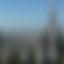

In [12]:
html_page

In [13]:
import time
def find_page(link):
    listings=[]
    elements=link.xpath('//div[@class="iva-item-content-m2FiN"]/div[@class="iva-item-body-NPl6W"]')
    for element in elements:
        prop_name=element.xpath('./div[@class="iva-item-titleStep-2bjuh"]/a/@title')[0]
        price=element.xpath('./div[@class="iva-item-priceStep-2qRpg"]/span/span/meta[@itemprop="price"]/@content')[0]
        region=element.xpath('./div[@class="iva-item-developmentNameStep-1hr7p"]/div/span/span/text()')
        if len(region)>0:
            region=region[0]
        else:
            region=None
        listings.append({"prop_name":prop_name,"price":price,"region":region})
    return listings

In [14]:
all_listings=[]
for i in range(1,100+1):
    driver.get(f"https://www.avito.ru/rossiya/zemelnye_uchastki?cd=1&p={i}")
    time.sleep(10)
    html_page=driver.page_source
    tree=html.fromstring(html_page)
    listings=find_page(tree)
    if len(listings)>0:
        all_listings.extend(listings)
        time.sleep(10)
    else:
        print(i)
        break

In [15]:
import pandas as pd

In [17]:
df_apartments

,prop_name,price,region
0,"Участок 12,5 сот. (ИЖС) в Челябинске",300000,"Челябинская область, Сосновский р-н, пос. Полевой"
1,"Участок 6 сот. (СНТ, ДНП) в Невинномысске",435000,"Ставропольский край, Невинномысск, СНТ Заря"
2,"Участок 10 сот. (СНТ, ДНП) в Уфе",650000,"Республика Башкортостан, Уфимский р-н, Зубовск..."
3,"Участок 14 сот. (СНТ, ДНП) в Кунгуре",50000,"Пермский край, Кунгурский р-н, Ергачинское сел..."
4,"Участок 24 сот. (СНТ, ДНП) в Нижнекамске",60000,"Республика Татарстан, Нижнекамский р-н, с. Ела..."
...,...,...,...
5595,Участок 10 сот. (ИЖС) в Кургане,200000,"Курганская область, Кетовский р-н, СНТ Болдино"
5596,Участок 15 сот. (ИЖС) в Рамони,1100000,"Воронежская область, Рамонский р-н, с. Карачун"
5597,"Участок 6 сот. (СНТ, ДНП) в Самаре",600000,"Самарская область, Самара"
5598,"Участок 6 сот. (СНТ, ДНП) в Брянске",180000,"Брянская область, Брянский р-н, Снежское сельс..."


In [16]:
df_apartments=pd.DataFrame(all_listings)
df_apartments.to_csv('all_land.csv',index=False,encoding='utf-8-sig')

In [18]:
driver.close()

In [48]:
df=pd.read_csv("all_land.csv")

In [49]:
import re
df['land_area']=df.prop_name.apply(lambda x: re.findall(r"\s[0-9,\.]{1,}\sсот|\s[0-9,\.]{1,}\sга",x))

In [50]:
df['land_area']=df.land_area.apply(lambda x: x[0].strip().replace(",",".") if len(x)>0 else None)

In [51]:
df

,prop_name,price,region,land_area
0,"Участок 12,5 сот. (ИЖС) в Челябинске",300000,"Челябинская область, Сосновский р-н, пос. Полевой",12.5 сот
1,"Участок 6 сот. (СНТ, ДНП) в Невинномысске",435000,"Ставропольский край, Невинномысск, СНТ Заря",6 сот
2,"Участок 10 сот. (СНТ, ДНП) в Уфе",650000,"Республика Башкортостан, Уфимский р-н, Зубовск...",10 сот
3,"Участок 14 сот. (СНТ, ДНП) в Кунгуре",50000,"Пермский край, Кунгурский р-н, Ергачинское сел...",14 сот
4,"Участок 24 сот. (СНТ, ДНП) в Нижнекамске",60000,"Республика Татарстан, Нижнекамский р-н, с. Ела...",24 сот
...,...,...,...,...
5595,Участок 10 сот. (ИЖС) в Кургане,200000,"Курганская область, Кетовский р-н, СНТ Болдино",10 сот
5596,Участок 15 сот. (ИЖС) в Рамони,1100000,"Воронежская область, Рамонский р-н, с. Карачун",15 сот
5597,"Участок 6 сот. (СНТ, ДНП) в Самаре",600000,"Самарская область, Самара",6 сот
5598,"Участок 6 сот. (СНТ, ДНП) в Брянске",180000,"Брянская область, Брянский р-н, Снежское сельс...",6 сот


In [53]:
def quick_convert(x):
    try:
        return int(x)
    except:
        return None

In [54]:
df["price"]=df.price.apply(lambda x: quick_convert(x))

In [55]:
new_df=df[['land_area','price','region']]

In [56]:
new_df.to_csv("all_land_final.csv",index=False,encoding='utf-8-sig')